<a href="https://colab.research.google.com/github/praveenbejo95/Netflix-Movies-and-TV-shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/4th ML(unsupervised) project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [4]:
# Loading the csv File

netflix_df = pd.read_csv(path)
netflix_df.head() #It gives top 5 rows of dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#It gives last 5 rows of the dataset
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# It gives Total number of rows and columns of dataset
netflix_df.shape

(7787, 12)

In [7]:
#It gives total columns, data types and null count of dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Find the various statistic for all the columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## **Data Cleaning**

**Why do we need to handle missing values?**

* **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**

In [9]:
#Let's count how many missing values we have
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**It shows the number of np.nan or null values or missing values are present in the dataset**

## **Duplicate values**

**Why is it important to remove duplicate records from my data?**

* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

In [10]:
# Checking Duplicate Values
value=len(netflix_df[netflix_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**It shows that there are no Duplicated Values present in the dataset.**

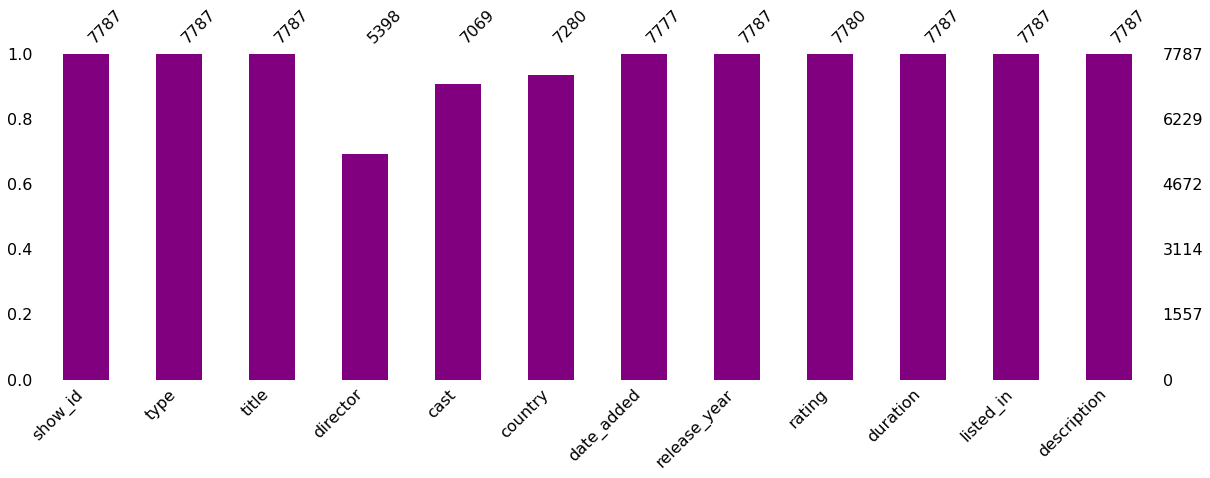

In [11]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(netflix_df,figsize = (20,6),color = 'purple')

In [12]:
# Checking the NAN/Null values in our dataset
for i in netflix_df.columns:
    null_percentage = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_percentage > 0 :
        print("{} column null percentage :{}%".format(i,round(null_percentage,2)))

director column null percentage :30.68%
cast column null percentage :9.22%
country column null percentage :6.51%
date_added column null percentage :0.13%
rating column null percentage :0.09%


**The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems.**

In [13]:
#lets drop director and cast column as this are not too important

netflix_df.drop(['director','cast'], inplace = True, axis = 1)

In [14]:
#lets drop null values in rating and date added as their are very few number of null values

netflix_df.dropna(subset=['rating', 'date_added'],inplace = True)

In [15]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [16]:
netflix_df['country'].value_counts() 

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

**As we can see country column has multiple countries in it so we will create a new column containing only one country.** 

In [17]:
netflix_df['prime_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['prime_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: prime_country, dtype: object

## **Let's genereate new columns for our analyis**

In [18]:
netflix_df['year_added'] =netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])

In [19]:
netflix_df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [20]:
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])

In [21]:
netflix_df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [22]:
#lets convert the category accourding to age wise for better understanding and thus making eda more interpretable 

age_wise_rating = {   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

netflix_df['age_wise_rating'] = netflix_df['rating'].replace(age_wise_rating)
netflix_df['age_wise_rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [23]:
netflix_df['age_wise_rating'].value_counts()

Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: age_wise_rating, dtype: int64

In [24]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          7770 non-null   object
 1   type             7770 non-null   object
 2   title            7770 non-null   object
 3   country          7770 non-null   object
 4   date_added       7770 non-null   object
 5   release_year     7770 non-null   int64 
 6   rating           7770 non-null   object
 7   duration         7770 non-null   object
 8   listed_in        7770 non-null   object
 9   description      7770 non-null   object
 10  prime_country    7770 non-null   object
 11  year_added       7770 non-null   object
 12  month_added      7770 non-null   object
 13  age_wise_rating  7770 non-null   object
dtypes: int64(1), object(13)
memory usage: 910.5+ KB


In [25]:
# lets convert the columns into appropriate data type

netflix_df['type'] = pd.Categorical(netflix_df['type'])

netflix_df['age_wise_rating'] = pd.Categorical(netflix_df['age_wise_rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults' ])

netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

In [26]:
# Check the variable type if it change or not

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   show_id          7770 non-null   object  
 1   type             7770 non-null   category
 2   title            7770 non-null   object  
 3   country          7770 non-null   object  
 4   date_added       7770 non-null   object  
 5   release_year     7770 non-null   int64   
 6   rating           7770 non-null   object  
 7   duration         7770 non-null   object  
 8   listed_in        7770 non-null   object  
 9   description      7770 non-null   object  
 10  prime_country    7770 non-null   object  
 11  year_added       7770 non-null   int64   
 12  month_added      7770 non-null   object  
 13  age_wise_rating  7770 non-null   category
dtypes: category(2), int64(2), object(10)
memory usage: 804.6+ KB


## **Performing EDA**

## **Analyze the type of content available on Netflix**

In [27]:
netflix_df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

No handles with labels found to put in legend.


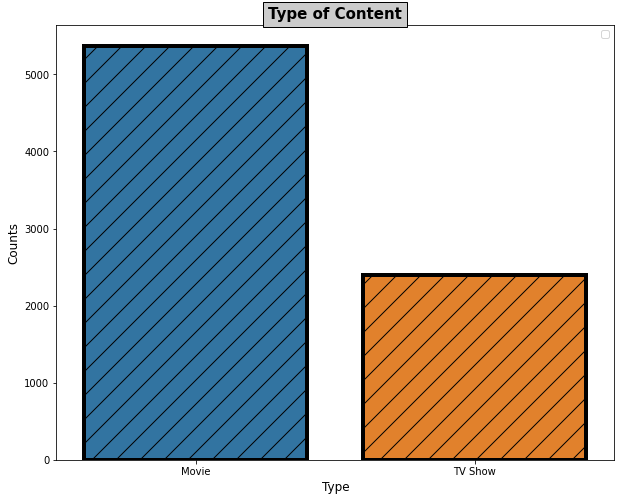

In [28]:
# Plotting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='black',
                  hatch='/')
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()

* **Percentage of movies is way greater than TV-shows on netflix.**
* **Nearly 70% of the content is of type- Movies whereas the rest 30% is TV-shows.**
* **There are 5372 movies and 2398 TV-shows available on netflix.**

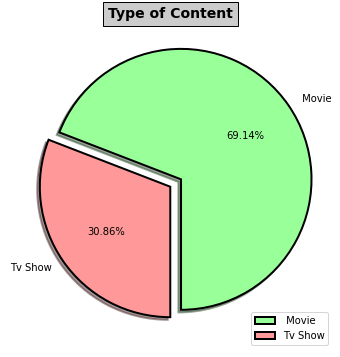

In [29]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Movie",'Tv Show']
values = netflix_df['type'].value_counts().values

# Plotting the graph
myexplode = [0.1, 0]
colors = ['#99ff99', '#ff9999']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Type of Content', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

* **It is evident that there are more movies on Netflix than TV shows.**
* **Netflix has 5372 movies, which is more than double the quantity of TV shows.**

## **Movie ratings analysis**

In [30]:
netflix_df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Text(0, 0.5, 'Counts')

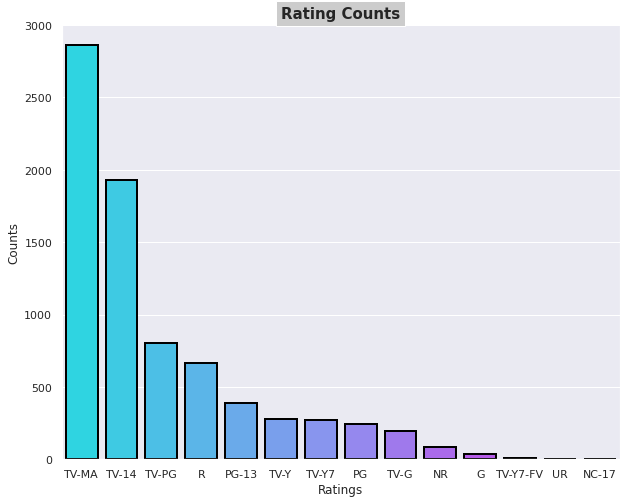

In [31]:
# Plotting the countplot for the ratings
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',palette="cool",
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

Text(0, 0.5, 'Counts')

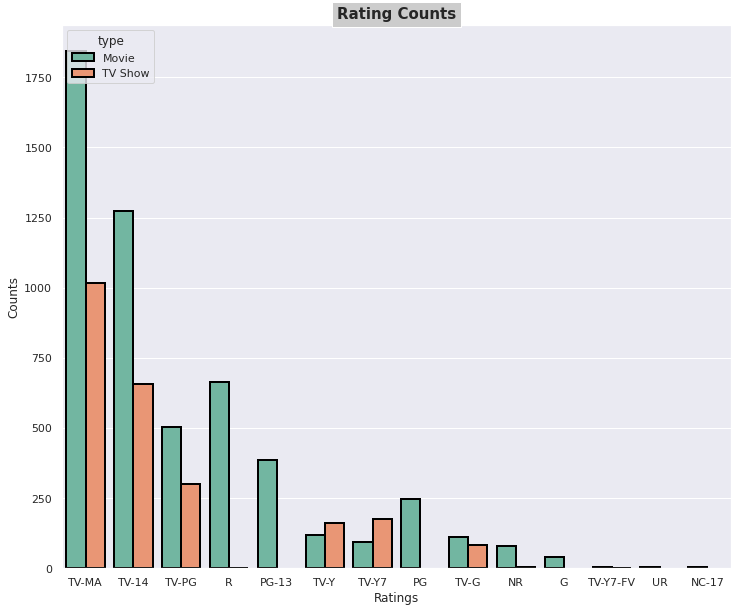

In [32]:
# Plotting the countplot for movie and Tv show ratings
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',hue='type',palette='Set2',
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

* **The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.**
* **The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.**
* **The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian."**

In [33]:
netflix_df['age_wise_rating'].value_counts()

Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: age_wise_rating, dtype: int64

Text(0, 0.5, 'Counts')

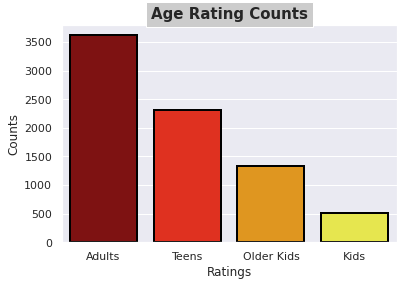

In [34]:
# Countplot for Adult, Teen, Kids, Older Kids
ax=sns.countplot('age_wise_rating',data=netflix_df,lw=2, ec='black',palette='hot',
                  order = netflix_df['age_wise_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

* **We can observe from the above count plot that the majority of Netflix material is intended for adults. There is very little content available for teens and kids.**

## **Growth in content over the years**

Text(0.5, 0, 'Added Year')

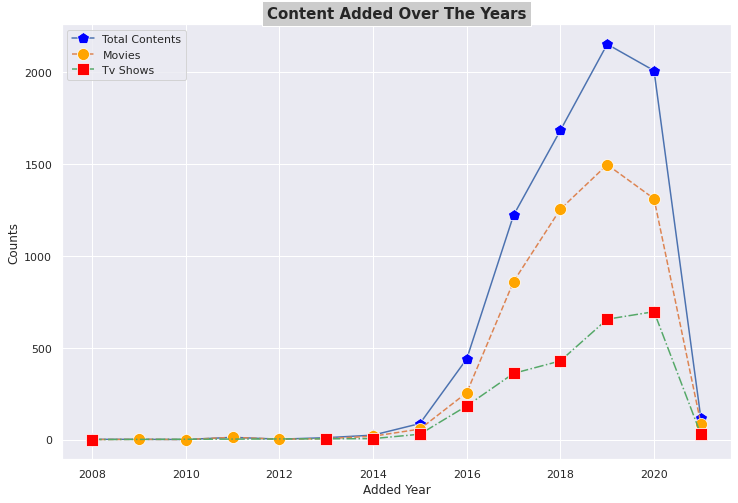

In [35]:
# Plotting the graph for the growth of contents over the netflix
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

tv = df_tv[col].value_counts().reset_index().sort_values('index')
tv = tv.rename(columns = {col : "count", "index" : col})
tv = tv.sort_values(col)

movies = df_movies[col].value_counts().reset_index().sort_values("index")
movies = movies.rename(columns = {col : "count", "index" : col})
movies = movies.sort_values(col)

total = netflix_df[col].value_counts().reset_index().sort_values("index")
total = total.rename(columns = {col : "count", "index" : col})
total = total.sort_values(col)



trace3 = sns.lineplot(x=total[col], y=total["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'p',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=movies[col], y=movies["count"], data=df_movies,linestyle = 
                      'dashed', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=tv[col], y=tv["count"], data=df_tv,linestyle = 
                      'dashdot', marker = 's',
         markerfacecolor = 'red', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added Over The Years",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Year')

* **Netflix has been adding more number of movies then TV shows since year 2016.**
* **2019 is the year of maximum movies released on netflix. A total of 1497 movies were added during this year.**
* **Max number of Tv shows were added during the year 2020. 697 Tv shows are released during this year.**

Text(0.5, 1.0, 'Cumulative')

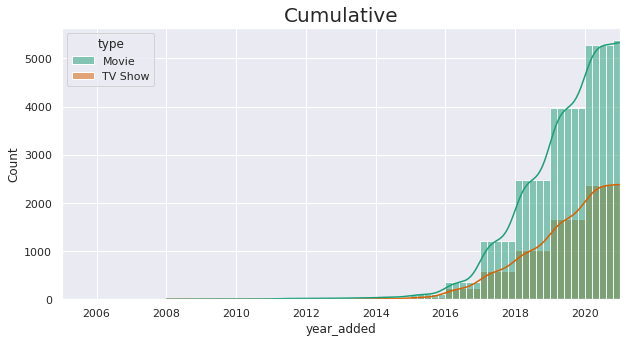

In [36]:
# Cumulative
plt.figure(figsize= (10,5))
ax=sns.histplot(x= netflix_df.year_added, hue= netflix_df.type, kde= True,palette='Dark2', cumulative= True)
plt.xlim(2005,2021)
plt.title("Cumulative", fontsize= 20)

* **The number of movies on Netflix is growing significantly faster than the number of TV shows.**
* **In both 2018 and 2019, approximately 1200 new movies were added.**
* **We saw a huge increase in the number of movies and television episodes after 2014.**
* **Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.**
* **It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.**

Text(0, 0.5, 'Country Name')

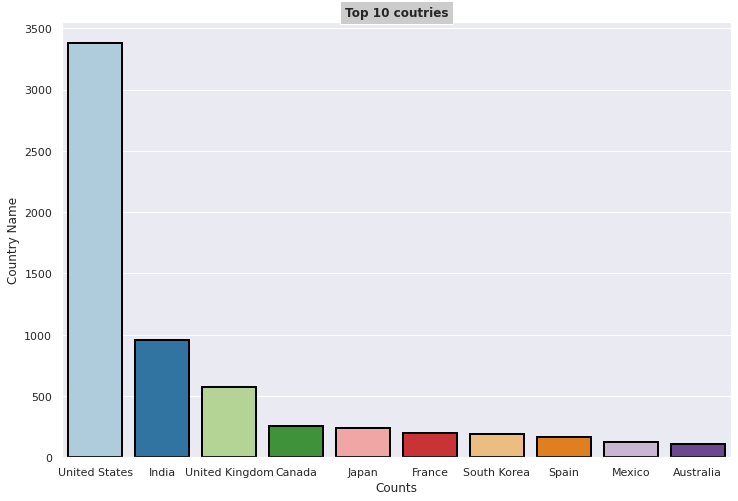

In [37]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='prime_country',data=netflix_df,lw=2, ec='black',palette='Paired',
              order=netflix_df['prime_country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold",
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Counts')
plt.ylabel('Country Name')

**The United States is the most prolific generator of Netflix content, with India and the United Kingdom trailing far behind.**

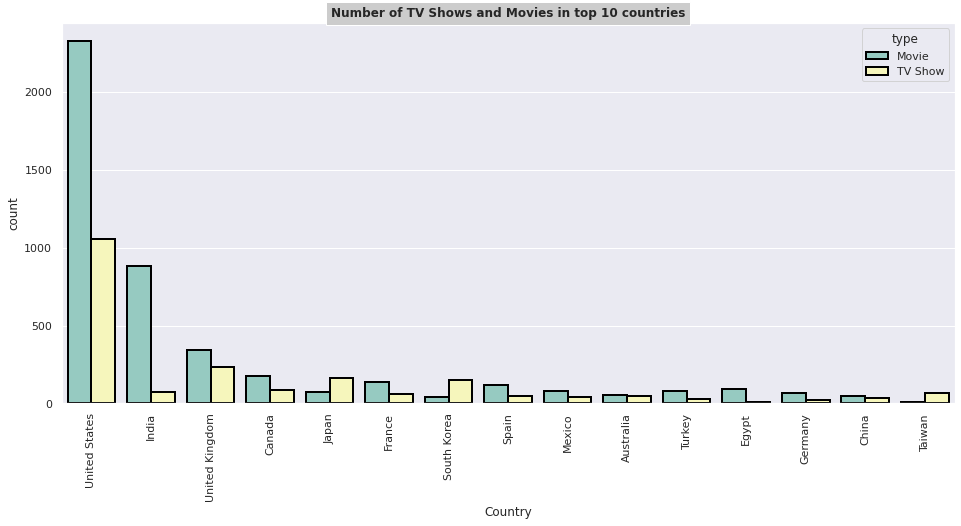

In [38]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(16,7))
ax=sns.countplot(x="prime_country",data= netflix_df,lw=2, ec='black',hue= "type",palette='Set3',order = netflix_df['prime_country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold",
           bbox={'facecolor':'0.8', 'pad':5},)
plt.show()

* **Netflix is most popular in United States**
* **India and UK falls at second and third place respectively in the popularity list.**
* **The majority of content on netflix in India is comprised of Movies where as majority of content in South Korea is comprised of TV shows.**

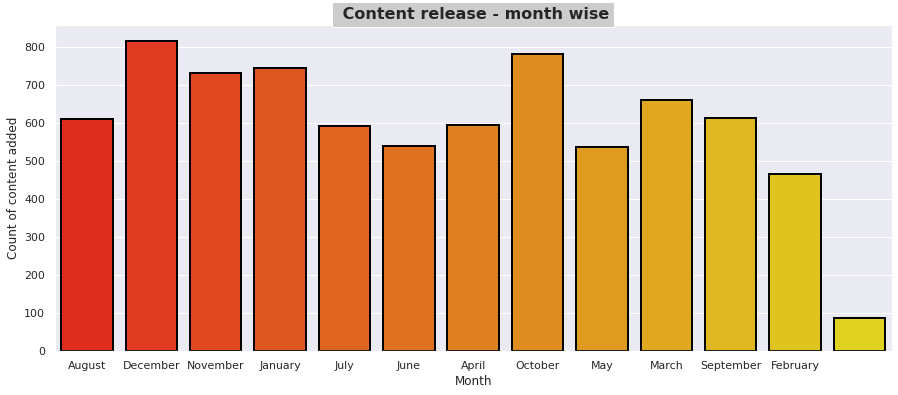

In [39]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=netflix_df,palette='autumn',lw=2, ec='black')

plt.title(' Content release - month wise',size='16',fontweight="bold",
          bbox={'facecolor':'0.8', 'pad':5},)    
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

* **The above graph shows that the most content is added to Netflix in December.**
* **In February, Netflix adds extremely few new movies and television episodes.**

Text(0.5, 0, 'Release Year')

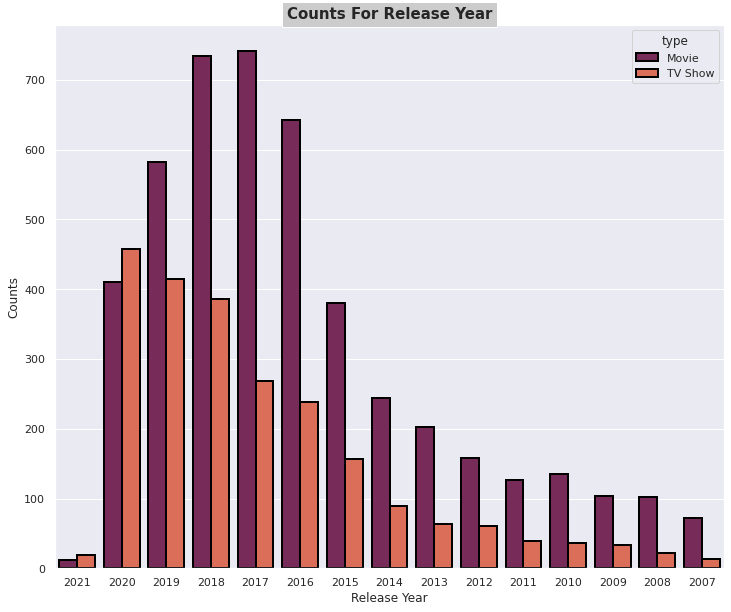

In [40]:
# Plotting the Countplot for release year analysis
plt.figure(figsize=(12,10))
ax=sns.countplot('release_year',data=netflix_df,hue='type',palette='rocket',lw=2, ec='black',
                  order=[2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
                     ,2009,2008,2007])
# We take only those year under consideration, onwards which netflix starts streaming services.

plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.ylabel('Counts')
plt.xlabel('Release Year')

* **According to the following countplot, above 700 movies were released in 2017, which is the most number of releases in any year.**
* **According to the above countplot, there will be above 400 television shows released in 2020, which is the most of any year.**

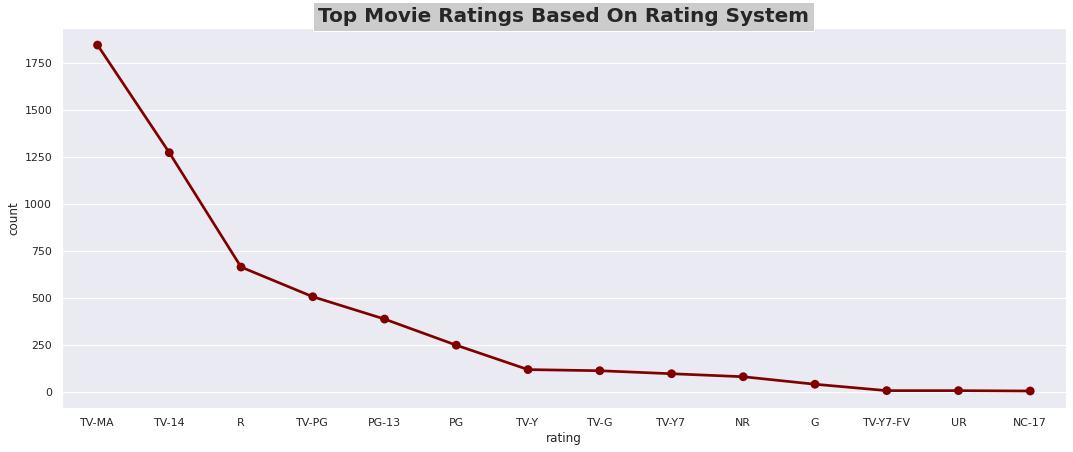

In [41]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',lw=2, ec='black',data=movie_ratings,color="maroon")
plt.title('Top Movie Ratings Based On Rating System',size='20',fontweight="bold",
          bbox={'facecolor':'0.8', 'pad':5},)
plt.show()

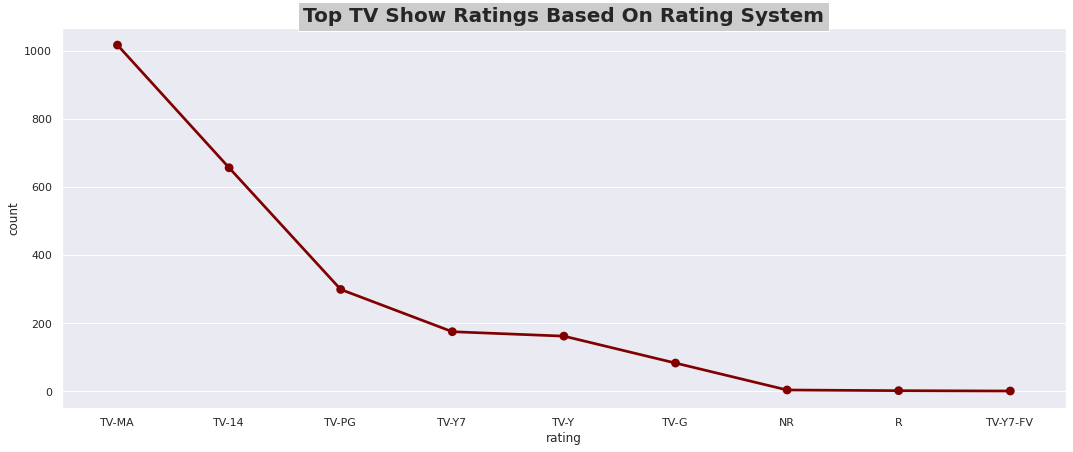

In [42]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',lw=2, ec='black',data=tv_ratings,color="maroon")
plt.title('Top TV Show Ratings Based On Rating System',size='20',fontweight="bold",
          bbox={'facecolor':'0.8', 'pad':5},)
plt.show()

* **Movies and TV-shows belonging to 'TV-MA' rating are highest on netflix. It is for Mature audience only i.e. viewed by adults and therefore may be unsuitable for children under 17**
* **The second most popular rating is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.**
* **The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian**

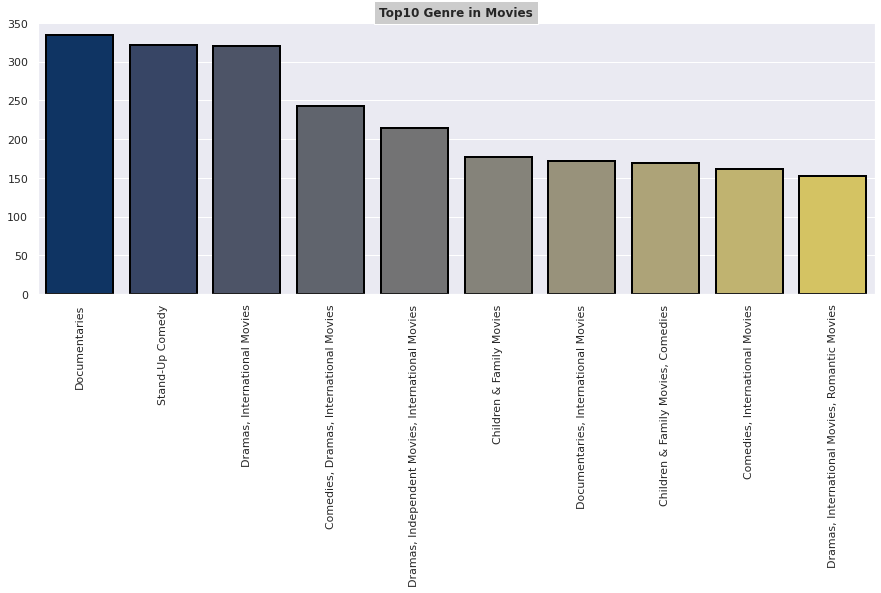

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,lw=2, ec='black',
            y = df_movies["listed_in"].value_counts().head(10).values,palette="cividis")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontweight="bold",
           bbox={'facecolor':'0.8', 'pad':5},)
plt.show()

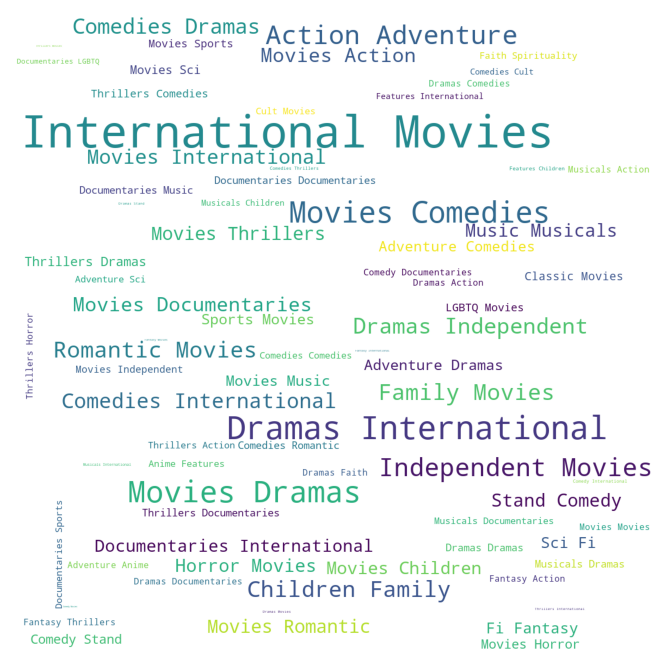

In [44]:
#Wordcloud for the movies
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* **International movies, dramas and comedies are top 3 genres in movies on netflix.**

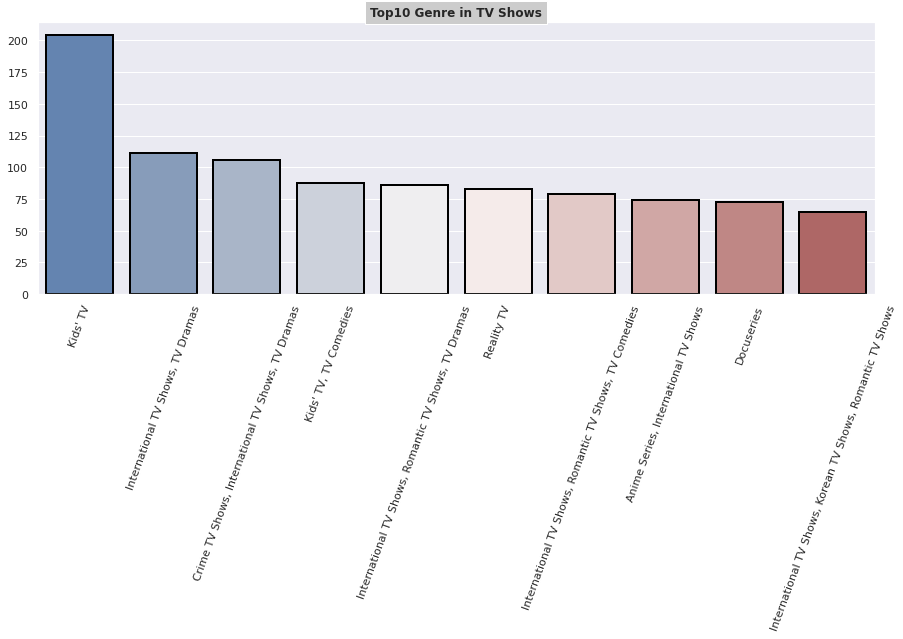

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,lw=2, ec='black',
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold",
          bbox={'facecolor':'0.8', 'pad':5},)
plt.show()

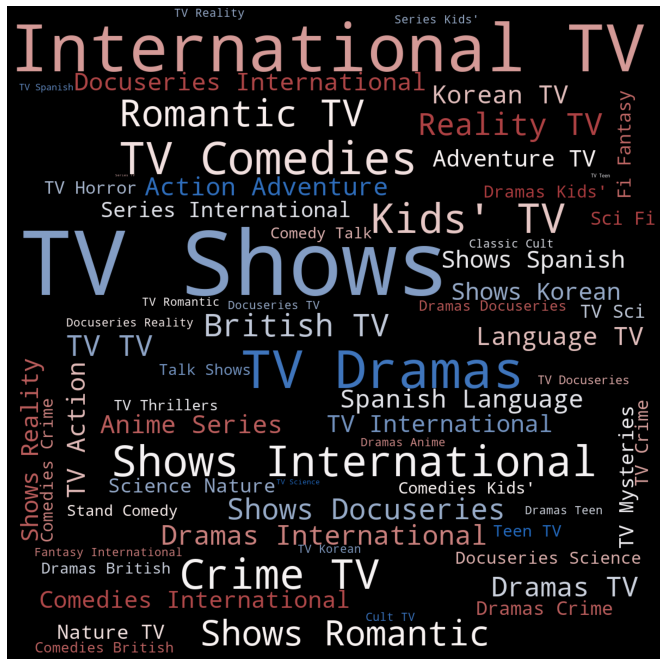

In [46]:
#PLotting on wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* **Internatinal TV shows, Comedies and drama are top 3 genres in tv shows on netflix.**

## **Netflix Content for different age groups in top 10 countries**

In [47]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('prime_country')[['prime_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['prime_country']


df_heatmap = netflix_df.loc[netflix_df['prime_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['prime_country'],df_heatmap['age_wise_rating'],normalize = "index").T
df_heatmap

prime_country,Canada,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
age_wise_rating,,,,,,,,,,
Kids,0.150579,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.009434,0.078125,0.089080
Older Kids,0.220077,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.094340,0.184028,0.202131
Teens,0.162162,0.173469,0.561715,0.348936,0.130081,0.365979,0.113095,0.349057,0.211806,0.245635
Adults,0.467181,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.547170,0.526042,0.463155


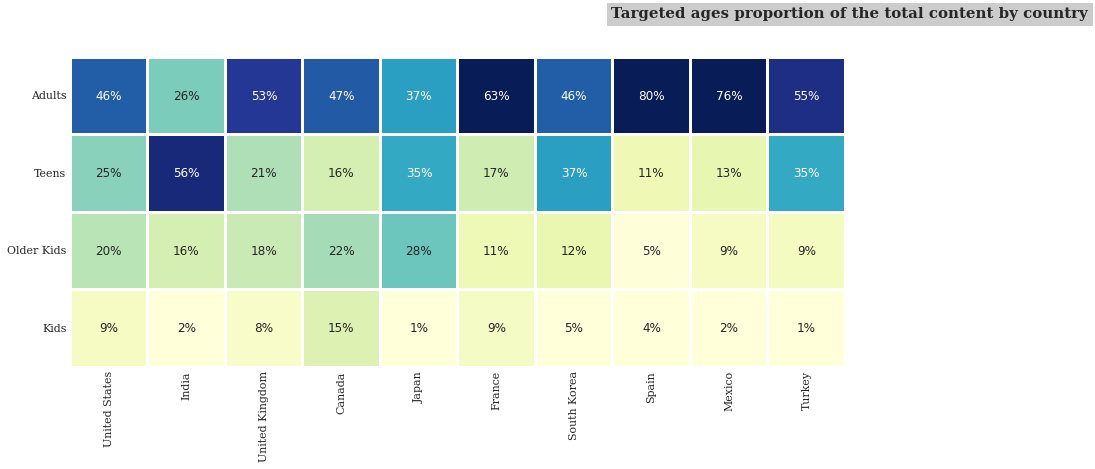

In [48]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Turkey']

age_order = ['Adults', 'Teens',  'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,lw=2, ec='black',
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Targeted ages proportion of the total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='center',
         bbox={'facecolor':'0.8', 'pad':5},)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

* **Content developed by netflix moslty target teen. 56% of content is for teen which is highest as compared to any other country.**
* **Content developed by netflix in Spain, Mexico and France is mostly for adults.**

In [49]:
#groupby country and Ratings feature
content_in_different_countries=netflix_df.groupby(['prime_country','rating']).count().reset_index()

In [50]:
import plotly.express as px
(px.bar(content_in_different_countries, x="rating",y="prime_country", color="prime_country")
.update_layout(title_font_size=200)
.update_xaxes(showgrid=False)
).show()

## **Data Preprocessing**

In [51]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [52]:
#looking at description and listed_in columns
print(netflix_df['description'][0:11])
print('-'*70)
print(netflix_df['listed_in'][0:11])

0     In a future where the elite inhabit an island ...
1     After a devastating earthquake hits Mexico Cit...
2     When an army recruit is found dead, his fellow...
3     In a postapocalyptic world, rag-doll robots hi...
4     A brilliant group of students become card-coun...
5     A genetics professor experiments with a treatm...
6     After an awful accident, a couple admitted to ...
7     After one of his high school students attacks ...
8     When a doctor goes missing, his psychiatrist w...
9     An architect and his wife move into a castle t...
10    A farmer pens a confession admitting to his wi...
Name: description, dtype: object
----------------------------------------------------------------------
0     International TV Shows, TV Dramas, TV Sci-Fi &...
1                          Dramas, International Movies
2                   Horror Movies, International Movies
3     Action & Adventure, Independent Movies, Sci-Fi...
4                                                Dramas


In [53]:
# making the description column lowercase
netflix_df['description'] = netflix_df['description'].str.lower()
netflix_df['listed_in'] = netflix_df['listed_in'].str.lower()

In [54]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [55]:
netflix_df['description'] = netflix_df['description'].apply(remove_punctuation)
netflix_df['listed_in'] = netflix_df['listed_in'].apply(remove_punctuation)

In [56]:
# removing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [58]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [59]:
#defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [60]:
netflix_df['description'] = netflix_df['description'].apply(stopwords)
netflix_df['listed_in'] = netflix_df['listed_in'].apply(stopwords)

In [61]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix_df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [62]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

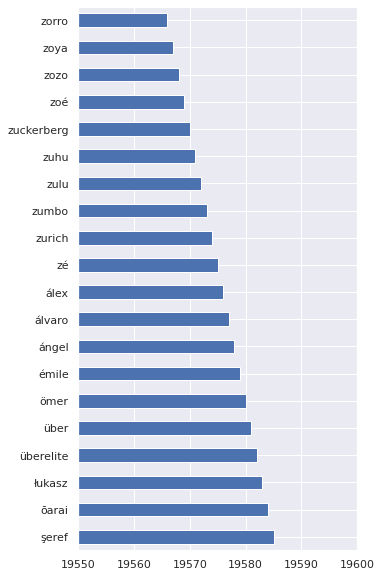

In [63]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (19550, 19600))

In [64]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix_df['listed_in'])
# collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()

In [65]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [66]:
vocab_bef_stem

tv                 41
thrillers          40
teen               39
talk               38
standup            37
sports             36
spirituality       35
spanishlanguage    34
shows              33
series             32
scifi              31
science            30
romantic           29
reality            28
nature             27
mysteries          26
musicals           25
music              24
movies             23
lgbtq              22
korean             21
kids               20
international      19
independent        18
horror             17
features           16
fantasy            15
family             14
faith              13
dramas             12
docuseries         11
documentaries      10
cult                9
crime               8
comedy              7
comedies            6
classic             5
children            4
british             3
anime               2
adventure           1
action              0
dtype: int64

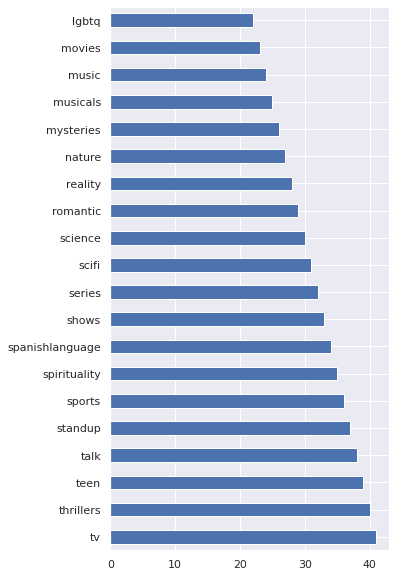

In [67]:
#plotting top words
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [68]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [69]:
#applying the stemmer to the description column
netflix_df['description'] = netflix_df['description'].apply(stemming)
netflix_df['listed_in'] = netflix_df['listed_in'].apply(stemming)
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,age_wise_rating,count
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Brazil,2020,August,Adults,1
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Mexico,2016,December,Adults,1
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Singapore,2018,December,Adults,1
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,United States,2017,November,Teens,1
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,United States,2020,January,Teens,1


## **TF-IDF vectorizer**

In [71]:
#tfidf for 'description' column
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['description'])

# collect the vocabulary items used in the vectorizer
dictionary_description = tfid_vectorizer.vocabulary_.items()

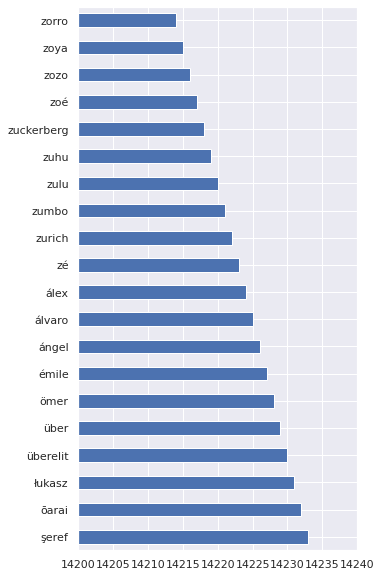

In [72]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_description:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (14200, 14240))

In [74]:
#tfidf for 'listed_in'  column
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['listed_in'])

# collect the vocabulary items used in the vectorizer
dictionary_listed_in = tfid_vectorizer.vocabulary_.items()

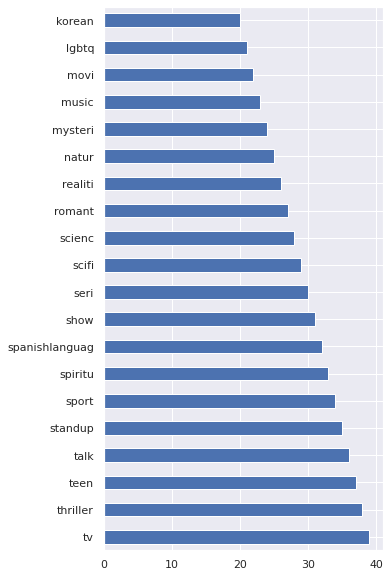

In [75]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [76]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [78]:
#applying length function to both the columns
netflix_df['length'] = netflix_df['description'].apply(length)
netflix_df['length_listed'] = netflix_df['listed_in'].apply(length)

In [79]:
# converting the 'type' column to numberic data type
netflix_df['type'].replace(['TV Show','Movie'],[0,1],inplace = True)

In [80]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   show_id          7770 non-null   object  
 1   type             7770 non-null   int64   
 2   title            7770 non-null   object  
 3   country          7770 non-null   object  
 4   date_added       7770 non-null   object  
 5   release_year     7770 non-null   int64   
 6   rating           7770 non-null   object  
 7   duration         7770 non-null   object  
 8   listed_in        7770 non-null   object  
 9   description      7770 non-null   object  
 10  prime_country    7770 non-null   object  
 11  year_added       7770 non-null   int64   
 12  month_added      7770 non-null   object  
 13  age_wise_rating  7770 non-null   category
 14  count            7770 non-null   int64   
 15  length           7770 non-null   int64   
 16  length_listed    7770 non-null   int64   


In [82]:
# dropping unncessary columns
netflix_df.drop(['country','date_added','age_wise_rating'],axis = 1,inplace = True)

In [83]:
# final cleaned dataset
netflix_df.head()

,show_id,type,title,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,count,length,length_listed
0,s1,0,3%,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Brazil,2020,August,1,82,40
1,s2,1,7:19,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Mexico,2016,December,1,88,17
2,s3,1,23:59,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Singapore,2018,December,1,102,23
3,s4,1,9,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,United States,2017,November,1,89,43
4,s5,1,21,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,United States,2020,January,1,99,5


## **Silhouette Score**

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_for_clusterring =netflix_df[['length','length_listed','type']]
scaler_method =preprocessing.StandardScaler()
final_feature =scaler_method.fit_transform(features_for_clusterring) 
X=final_feature
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4274656774753808
For n_clusters = 3, silhouette score is 0.3176202205010559
For n_clusters = 4, silhouette score is 0.36165079637597136
For n_clusters = 5, silhouette score is 0.3708628926819384
For n_clusters = 6, silhouette score is 0.36492443668905705
For n_clusters = 7, silhouette score is 0.3575702711913515
For n_clusters = 8, silhouette score is 0.3584828476989966
For n_clusters = 9, silhouette score is 0.34482877602864426
For n_clusters = 10, silhouette score is 0.3372378944167131


For n_clusters = 2 The average silhouette_score is : 0.4274656774753808
For n_clusters = 3 The average silhouette_score is : 0.3174155520964508
For n_clusters = 4 The average silhouette_score is : 0.3616340681838076
For n_clusters = 5 The average silhouette_score is : 0.37072510586658797
For n_clusters = 6 The average silhouette_score is : 0.36493346665882304
For n_clusters = 7 The average silhouette_score is : 0.356902056952523
For n_clusters = 8 The average silhouette_score is : 0.3488903611943278
For n_clusters = 9 The average silhouette_score is : 0.3442609138504667
For n_clusters = 10 The average silhouette_score is : 0.3377624727736268


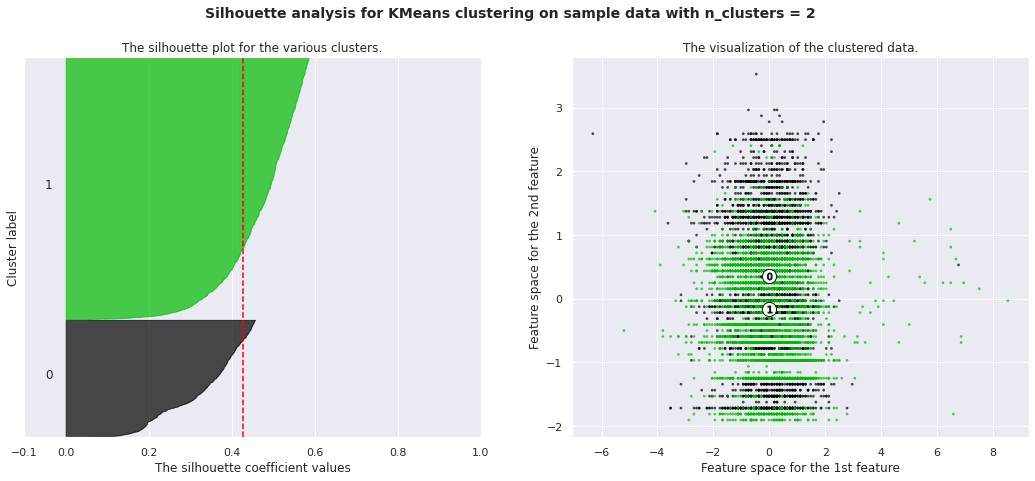

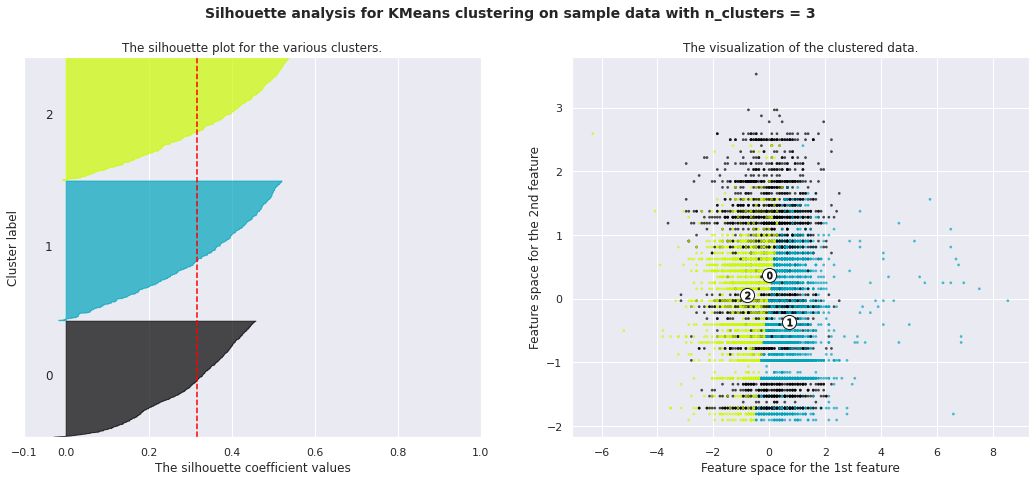

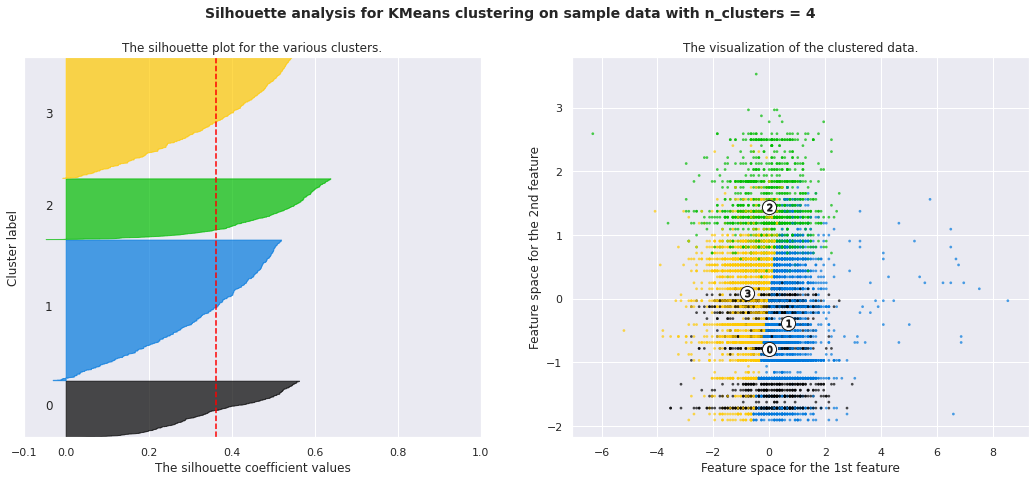

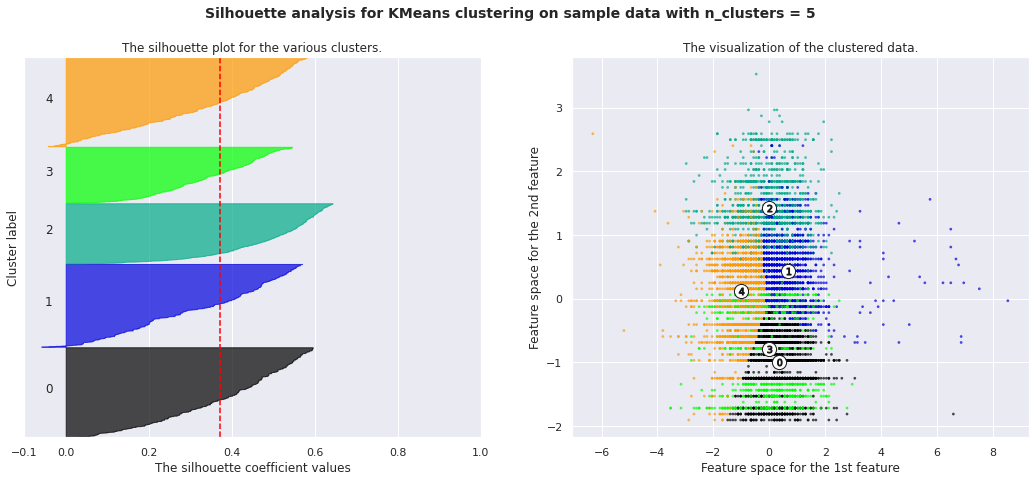

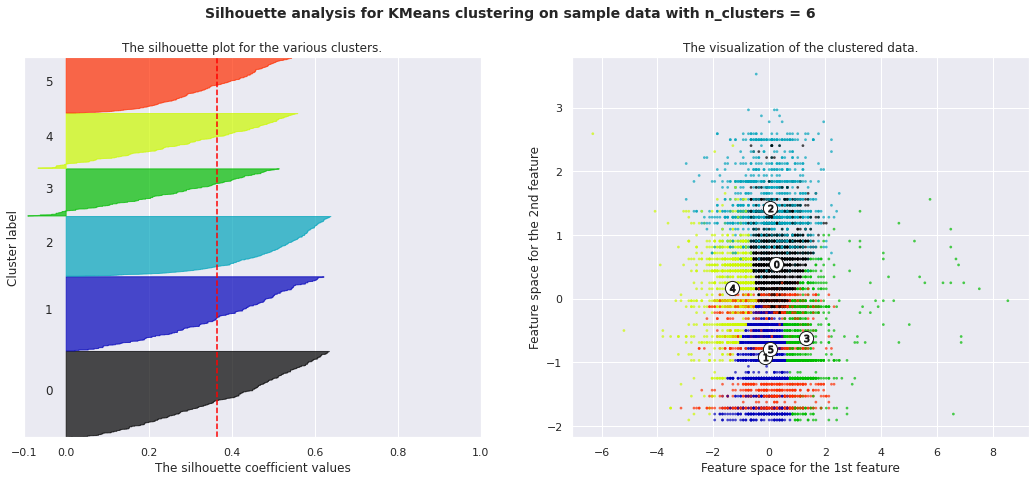

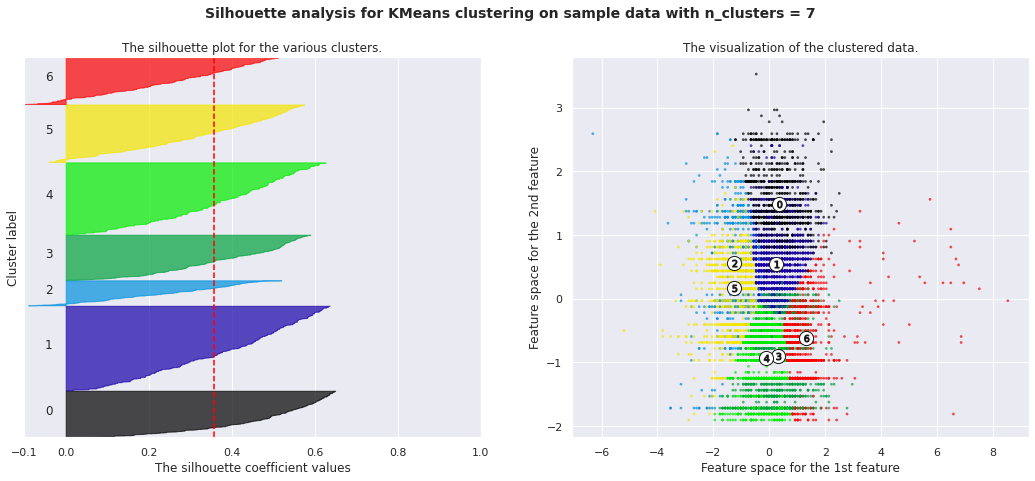

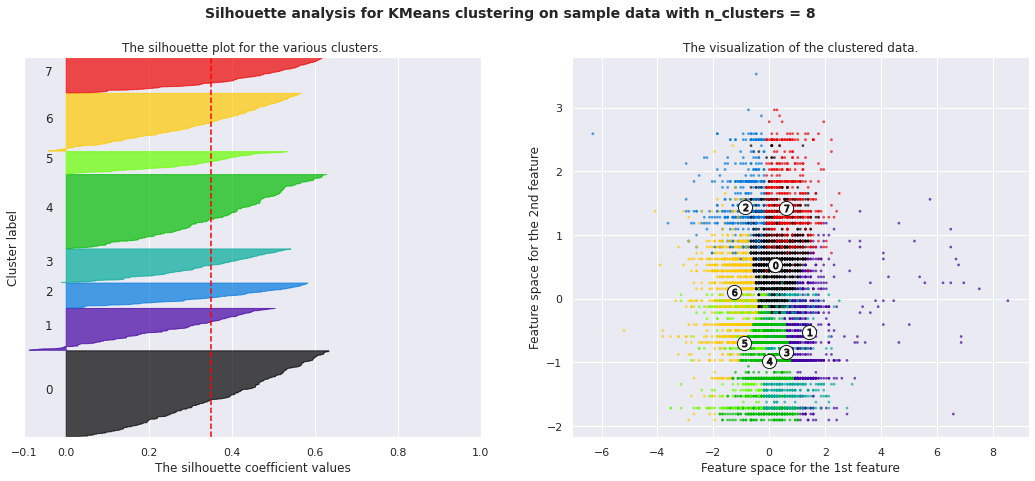

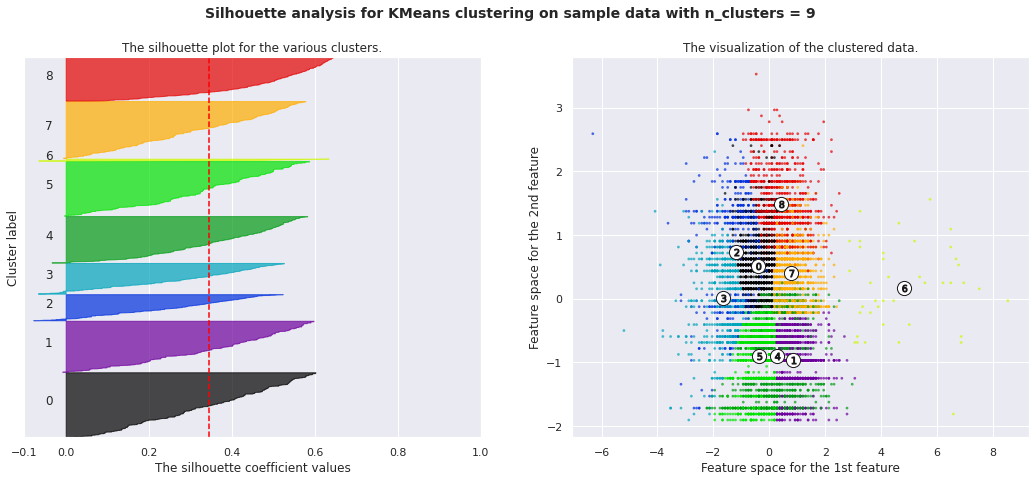

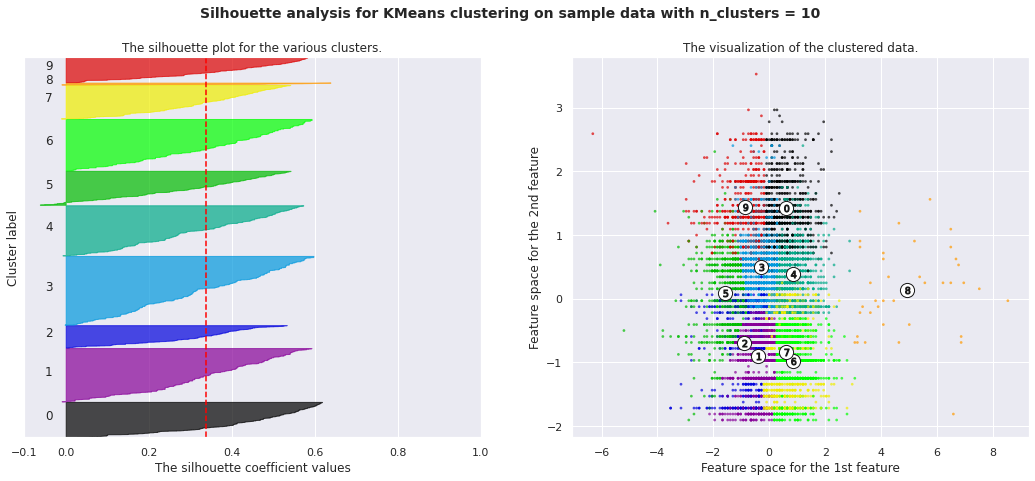

In [85]:
# viusalization of silhoutte score and clusters
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
     # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

## **K-means Clustering**

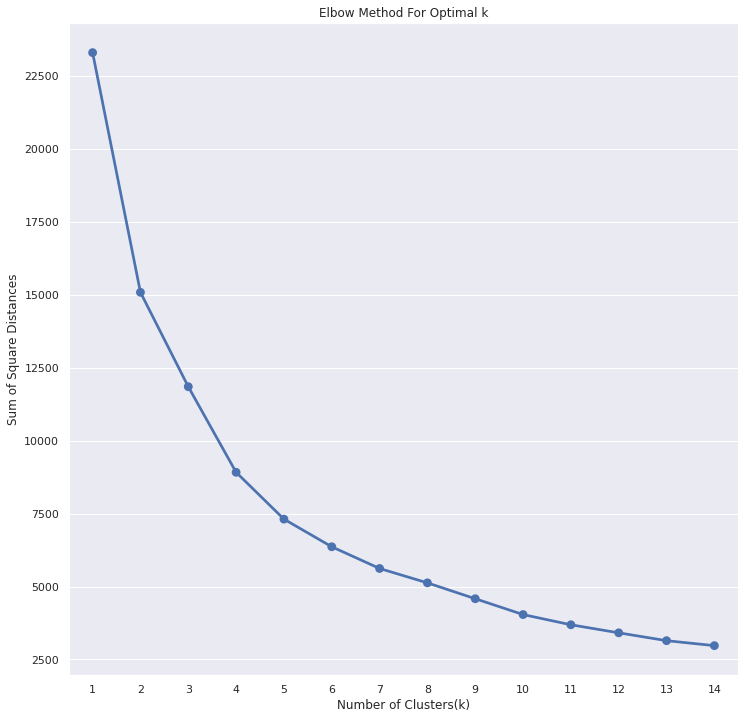

<Figure size 864x864 with 0 Axes>

In [86]:
# using elbow method to find the most suitable cluster numbers
features_for_clusterring =netflix_df[['length','length_listed','type']]
scaler_method =preprocessing.StandardScaler()
final_feature =scaler_method.fit_transform(features_for_clusterring) 
X=final_feature
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.figure(figsize=(12,12))
plt.show()

**Number of clusters(k) = 5 as it has the highest silhouette score and the error term i.e sum of square distance is between 7500 to 5000 which is acceptable.**

In [87]:
#Kmeans clustering Implementation
Kmeans_clustersmodel= KMeans(n_clusters=5)
Kmeans_clustersmodel.fit(X)

KMeans(n_clusters=5)

In [88]:
#Predicting from model and also checking centres_Cluster in arrays
pred= Kmeans_clustersmodel.predict(X)
centres_Cluster= Kmeans_clustersmodel.cluster_centers_
centres_Cluster

array([[ 0.36529354, -0.98841378,  0.66812325],
       [-0.00587776,  1.42803566, -1.49672982],
       [ 0.69988401,  0.43896293,  0.66682069],
       [-0.98098148,  0.1239098 ,  0.66119572],
       [ 0.00915356, -0.79042124, -1.49672982]])

In [89]:
#now creating a new feature name as cluster in which each row of content feature is assigned to their separate cluster
netflix_df['cluster'] = Kmeans_clustersmodel.labels_

In [90]:
#head of netflix_df_clean_frame
netflix_df.head()

,show_id,type,title,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,count,length,length_listed,cluster
0,s1,0,3%,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Brazil,2020,August,1,82,40,1
1,s2,1,7:19,2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Mexico,2016,December,1,88,17,0
2,s3,1,23:59,2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Singapore,2018,December,1,102,23,2
3,s4,1,9,2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,United States,2017,November,1,89,43,2
4,s5,1,21,2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,United States,2020,January,1,99,5,0


In [92]:
number_of_clusters=netflix_df['cluster'].value_counts().reset_index()
number_of_clusters

,index,cluster
0,3,1862
1,0,1842
2,2,1675
3,1,1239
4,4,1152


Text(0.5, 1.0, 'Checking the number of clusters')

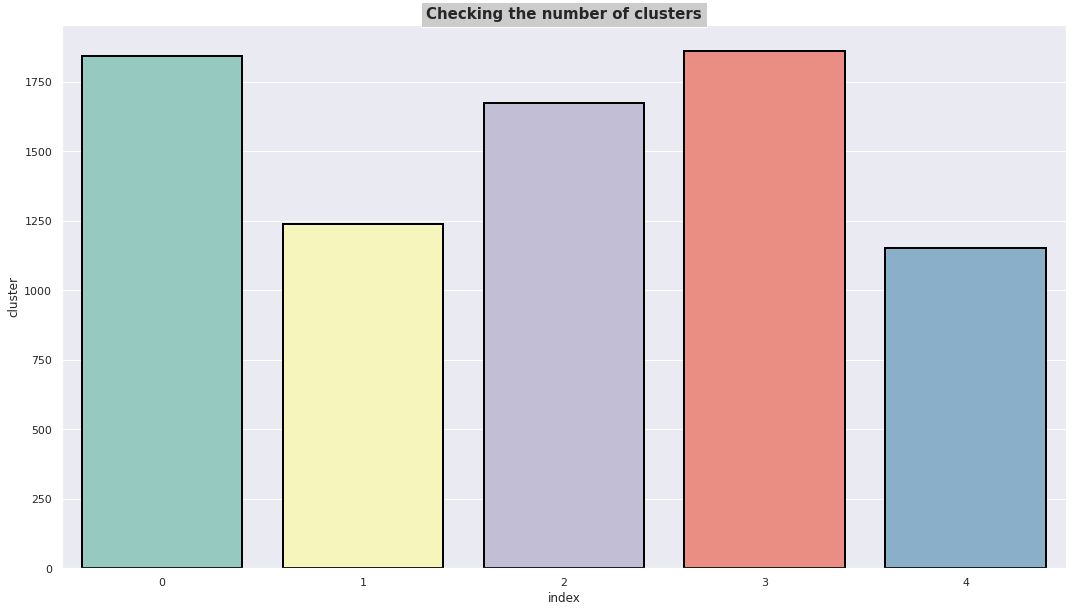

In [93]:
#checking the number of clusters
plt.figure(figsize=(18,10))
sns.barplot(x=number_of_clusters['index'],y=number_of_clusters['cluster'],lw=2, ec='black',palette='Set3')
plt.title('Checking the number of clusters', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)

**Cluster 0 and 3 has maximum number of data points clustterd together.**

## **Conclustion:**

**We concluded the following points:**

1. We've done null value treatment, feature engineering, and EDA since loading the dataset, and then we've completed some tasks that were assigned to us.

2. We have two types of content TV shows and Movies (30.86% contains TV shows and 69.14% contains Movies)

3. Netflix has increasingly focus on the movies than TV shows. It has been producing more movies than tv shows since after year 2014.

4. Netflix is most popular in United States. India lie at 2 position in popularity list.

5. In most of the countries the content available on netflix is mostly of movie type except in Sounth Korea and Japan.

6. Clusttering was done using 'length','length_listed' and 'type' column.

7. Using elbow method and silhoutte score the best number of cluster turned out to be 5 with silhoutte score of 0.37 which is great indicating our clusters are homogeneous but heterogeneous to one another.

